In [3]:
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from random import randrange

%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

### 5.11 Write a program implementing the three-layer MLP with the BP rule, incorporating the weight-decaying function.

#### (a) Generate 200 points from y = φ(x1 + 2x2 ) + 0.5(x1 − x2)^2 + 0.5N, where φ(·) is the logistic sigmoidal function, and N is a number drawn from the standard normal distribution. Apply the program on the samples.

#### (b) Test the program using 1000 randomly generated samples.

#### (c) Plot the training and testing errors versus the number of training epochs for differing weight-decay parameters.

#### (d) Describe the overfitting phenomenon observed.



In [4]:
def sigmoid(x):
    return 1.0 / (1 + np.exp(-x))


In [5]:

def generate_points():

    x1p = np.random.uniform(size=200)
    x2p = np.random.uniform(size=200)

    y = []
    for x1, x2 in zip(x1p, x2p):
        y.append(
            sigmoid(x1 + 2*x2) + 0.5 * (x1 - x2)**2 + 0.5 * np.random.standard_normal()
        )
    return x1p, x2p, y


In [19]:

x1, x2, y = generate_points()

x = [[a, b, c] for a, b, c in zip(x1, x2, y)]
x = np.array(x)

df = []

for i in range(1000):
    ri = randrange(len(x1))
    df.append(
        x[ri]
    )

train, test = train_test_split(df, test_size=0.3)

x_train        = [[x1, x2] for (x1, x2, y) in train]
train_examples = [[y] for (x1, x2, y) in train]

x_test        = [[x1, x2] for (x1, x2, y) in test]
test_examples = [[y] for (x1, x2, y) in test]



In [20]:
# build model
model = tf.keras.Sequential([    
    # number of neurons, input dimension, activation function
    tf.keras.layers.Dense(2, input_dim=2, activation='sigmoid'),         
    tf.keras.layers.Dense(8, activation='sigmoid'),
    tf.keras.layers.Dense(1, activation='linear')                       
])

optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse')

# train the model
history = model.fit( 
    x_train,
    train_examples,
    epochs=300,
    validation_data=(x_test, test_examples),
    verbose=False
) 

# predict = model.predict(x_train)


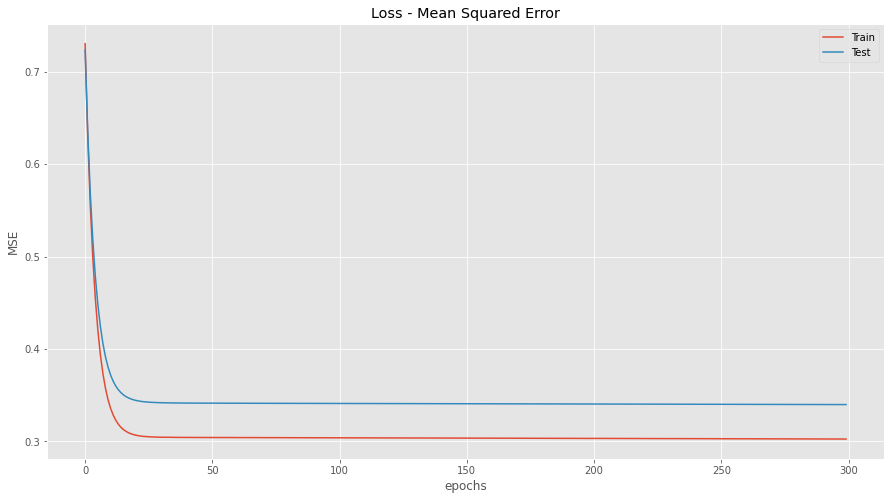

In [10]:
# train_mse = model.evaluate(x_train, train_examples)
# test_mse = model.evaluate(x_test, test_examples)
plt.style.use('ggplot')
plt.figure(figsize=(15,8))
plt.title("Loss - Mean Squared Error")
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.xlabel('epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

## Usando Weight Decay
- 0.001

In [35]:

l2 = tf.keras.regularizers.l2

# build model
model = tf.keras.Sequential([    
    # number of neurons, input dimension, activation function
    tf.keras.layers.Dense(2, input_dim=2, activation='sigmoid'),         
    tf.keras.layers.Dense(8, kernel_regularizer=l2(0.001), activation='sigmoid'),
    tf.keras.layers.Dense(1, activation='linear')                       
])

optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse')

# train the model
history = model.fit( 
    x_train,
    train_examples,
    epochs=300,
    validation_data=(x_test, test_examples),
    verbose=False
) 

# predict = model.predict(x_train)

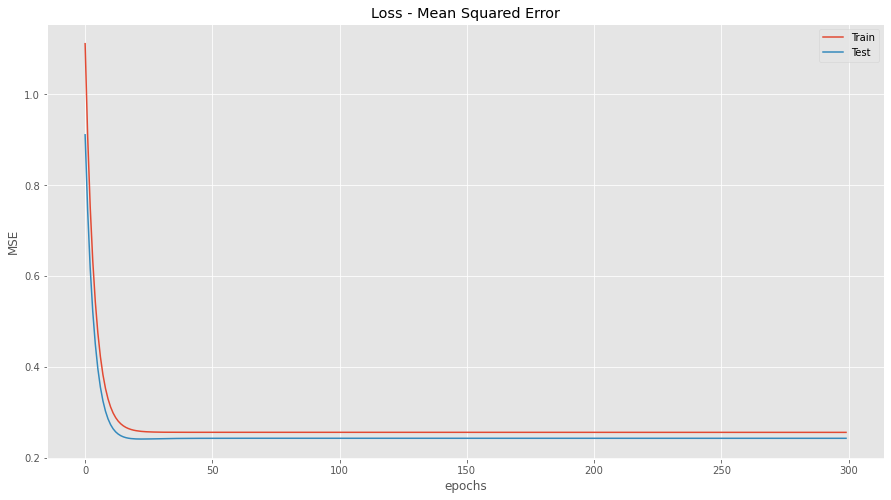

In [36]:
plt.style.use('ggplot')
plt.figure(figsize=(15,8))
plt.title("Loss - Mean Squared Error")
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.xlabel('epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

## Usando Weight Decay
- 0.005


In [27]:
l2 = tf.keras.regularizers.l2

# build model
model = tf.keras.Sequential([    
    # number of neurons, input dimension, activation function
    tf.keras.layers.Dense(2, input_dim=2, activation='sigmoid'),         
    tf.keras.layers.Dense(8, kernel_regularizer=l2(0.005), activation='sigmoid'),
    tf.keras.layers.Dense(1, activation='linear')                       
])

optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse')

# train the model
history = model.fit( 
    x_train,
    train_examples,
    epochs=300,
    validation_data=(x_test, test_examples),
    verbose=False
) 


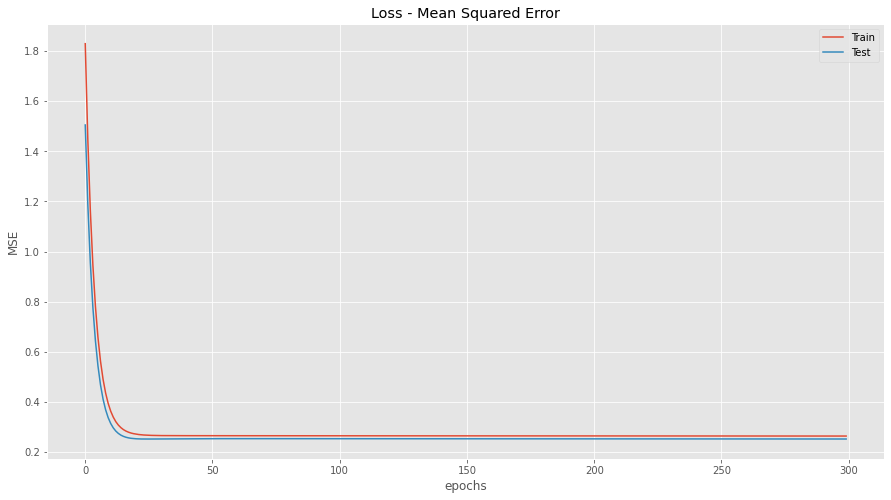

In [28]:
plt.style.use('ggplot')
plt.figure(figsize=(15,8))
plt.title("Loss - Mean Squared Error")
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.xlabel('epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

## Usando Weight Decay
- 0.01


In [37]:
l2 = tf.keras.regularizers.l2

# build model
model = tf.keras.Sequential([    
    # number of neurons, input dimension, activation function
    tf.keras.layers.Dense(2, input_dim=2, activation='sigmoid'),         
    tf.keras.layers.Dense(8, kernel_regularizer=l2(0.01), activation='sigmoid'),
    tf.keras.layers.Dense(1, activation='linear')                       
])

optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse')

# train the model
history = model.fit( 
    x_train,
    train_examples,
    epochs=300,
    validation_data=(x_test, test_examples),
    verbose=False
) 

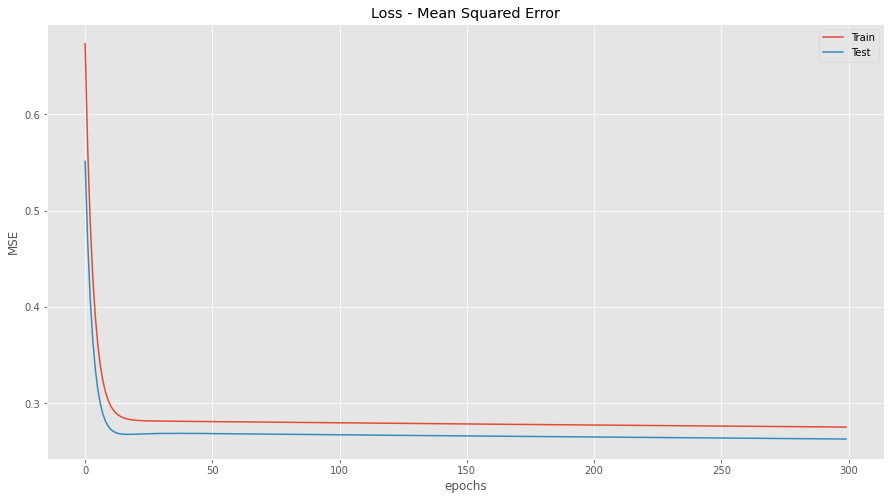

In [38]:
plt.style.use('ggplot')
plt.figure(figsize=(15,8))
plt.title("Loss - Mean Squared Error")
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.xlabel('epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

## Usando Weight Decay
- 0.05


In [39]:
l2 = tf.keras.regularizers.l2

# build model
model = tf.keras.Sequential([    
    # number of neurons, input dimension, activation function
    tf.keras.layers.Dense(2, input_dim=2, activation='sigmoid'),         
    tf.keras.layers.Dense(8, kernel_regularizer=l2(0.05), activation='sigmoid'),
    tf.keras.layers.Dense(1, activation='linear')                       
])

optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse')

# train the model
history = model.fit( 
    x_train,
    train_examples,
    epochs=300,
    validation_data=(x_test, test_examples),
    verbose=False
) 

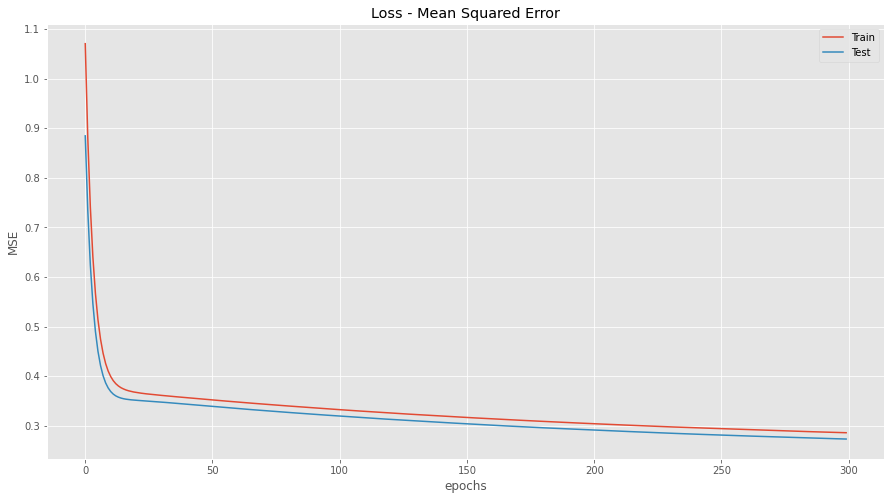

In [40]:
plt.style.use('ggplot')
plt.figure(figsize=(15,8))
plt.title("Loss - Mean Squared Error")
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.xlabel('epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()